# Digit Recognizer - MLP model using Keras & Tensorflow

In [6]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

from keras.datasets import mnist

In [51]:
print('Python ', sys.version[0:5])
print('Keras ', keras.__version__)

Python  3.5.2
Keras  2.0.0


## Data processing

In [61]:
sample_size = 60000
num_classes = 10

# fetching MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing data
x_train = x_train / 255
x_test = x_test / 255

# Fetching the first 18 images from the dataset (to be displayed later)
pixels_train = x_train[0:18,]
pixels_test = x_test[0:18,]

# Traing dataset
x_train = x_train[:sample_size,].reshape(sample_size, 784)
y_train = y_train[:sample_size,].reshape(sample_size, 1)

y_train = to_categorical(y_train, 10)

# Test dataset
x_test = x_test[:sample_size,].reshape(10000, 784)

## Build and train the model

In [63]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(20, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(20, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

print(model.summary())

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_training = model.fit(x_train, y_train, validation_split=0.3, epochs=100, callbacks=[early_stopping_monitor])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                210       
Total params: 16,330.0
Trainable params: 16,330
Non-trainable params: 0.0
_________________________________________________________________
None
Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 6s - loss: 0.4802 - acc: 0.8606 - val_loss: 0.2826 - val_acc: 0.9147
Epoch 2/100
42000/42000 [==============================] - 4s - loss: 0.2475 - acc: 0.9280 - val_loss: 0.2281 - val_acc: 0.9329
Epoch 3/100
42000/42000 [==============================] - 4s - loss: 0.2068 - acc: 0.9

## Model performance

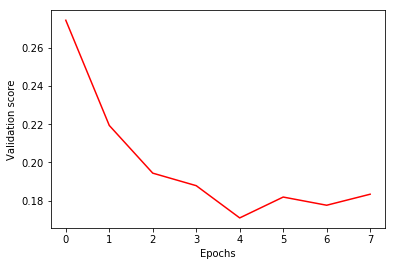

Test loss: 0.134660817133
Test accuracy: 0.959483333333


In [56]:
# Visual representation of how the model performed during traning
plt.plot(model_training.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Prediction

A sample of the actually images with the predicted class:


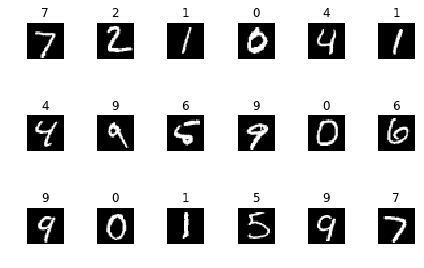

In [57]:
# prediction
pred_results = model.predict_classes(x_test, verbose=2)

# Compare predicted classes with actually images
fig, axeslist = plt.subplots(ncols=6, nrows=3)
for ind, p in zip(range(len(pixels_test)), pixels_test):
    axeslist.ravel()[ind].imshow(p, cmap='gray')
    axeslist.ravel()[ind].set_title(pred_results[ind])
    axeslist.ravel()[ind].set_axis_off()

print("A sample of the actually images with the predicted class:")
    
plt.tight_layout() # optional
plt.show()

## Kaggle

In [ ]:
testset = np.genfromtxt('test.csv', delimiter=',', skip_header=1)

A sample of the actually images with the predicted class:


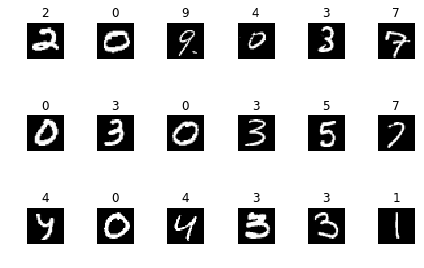

In [49]:
pixels_test = testset.reshape(28000,28,28)[0:18,]

# prediction
pred_results = model.predict_classes(testset, verbose=2)

# Compare predicted classes with actually images
fig, axeslist = plt.subplots(ncols=6, nrows=3)
for ind, p in zip(range(len(pixels_test)), pixels_test):
    axeslist.ravel()[ind].imshow(p, cmap='gray')
    axeslist.ravel()[ind].set_title(pred_results[ind])
    axeslist.ravel()[ind].set_axis_off()

print("A sample of the actually images with the predicted class:")
    
plt.tight_layout() # optional
plt.show()

df = pd.DataFrame({"ImageId": list(range(1,len(pred_results)+1)), "Label": pred_results})
df.to_csv('submission.csv', index=False, header=True)

In [ ]:
model.save('model_digits.h5')